In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("preprocessed_apartment_rentals_no_state_dummies_nocluster.csv")

# Features und Ziel
X = data.drop(columns=["price"])
y = data["price"]

# Numerische Spalten
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

# Skalieren
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])





# Regression

# Ridge Regression

In [45]:
from Nested_CV_targetEncoding import NestedCVRegressorWithTargetEncoding

In [46]:
from sklearn.linear_model import Ridge
import numpy as np
ridge_params = {"alpha": np.logspace(-3, 3, 10)}

ridge_cv = NestedCVRegressorWithTargetEncoding(model = Ridge(), param_grid = ridge_params, encode_cols=["state", "cityname"])
ridge_cv.run(X, y, output=True)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Outer Fold 1/5 | Best Params: {'model__alpha': np.float64(0.001)} | Fit Time: 1.377s | Outer R²: 0.683 | MSE: 149773.909
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Outer Fold 2/5 | Best Params: {'model__alpha': np.float64(0.001)} | Fit Time: 0.307s | Outer R²: 0.674 | MSE: 151188.662
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Outer Fold 3/5 | Best Params: {'model__alpha': np.float64(0.001)} | Fit Time: 0.206s | Outer R²: 0.676 | MSE: 151039.958
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Outer Fold 4/5 | Best Params: {'model__alpha': np.float64(0.001)} | Fit Time: 0.225s | Outer R²: 0.672 | MSE: 152190.155
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Outer Fold 5/5 | Best Params: {'model__alpha': np.float64(0.001)} | Fit Time: 0.202s | Outer R²: 0.680 | MSE: 148428.341


In [40]:
number_outer_cv_splits = 5
model_evaluation = pd.DataFrame({"Fold": range(1, number_outer_cv_splits+1)})
model_evaluation['Modell'] = ['Ridge_target_encoding'] * number_outer_cv_splits
model_evaluation['R_2'] = ridge_cv.get_r2_scores()
model_evaluation['MSE'] = ridge_cv.get_mse_scores()
model_evaluation["runtime"] = ridge_cv.get_fit_times()
model_evaluation

,Fold,Modell,R_2,MSE,runtime
0,1,Ridge_target_encoding,0.530843,221852.736077,0.162803
1,2,Ridge_target_encoding,0.521225,222042.033796,0.263329
2,3,Ridge_target_encoding,0.523888,221633.740846,0.192573
3,4,Ridge_target_encoding,0.521152,222227.988179,0.485176
4,5,Ridge_target_encoding,0.525471,220366.437025,0.259901


In [41]:
model_evaluation.to_pickle('benchmarking/Ridgeregression_targetencoding.pkl')

In [39]:
from sklearn.linear_model import Lasso
import numpy as np
lasso_params = {"alpha": np.logspace(-3, 3, 10)}

lasso_cv = NestedCVRegressorWithTargetEncoding(model = Lasso(), param_grid = lasso_params, encode_cols=["state"])
lasso_cv.run(X, y, output=True)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.835e+07, tolerance: 3.664e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.835e+07, tolerance: 3.664e+06
  model = cd_fast.enet_coordinate_descent(


Outer Fold 1/5 | Best Params: {'model__alpha': np.float64(0.021544346900318832)} | Fit Time: 6.671s | Outer R²: 0.531 | MSE: 221841.445
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.891e+07, tolerance: 3.682e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.891e+07, tolerance: 3.682e+06
  model = cd_fast.enet_coordinate_descent(


Outer Fold 2/5 | Best Params: {'model__alpha': np.float64(0.004641588833612777)} | Fit Time: 6.214s | Outer R²: 0.521 | MSE: 222048.021
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.609e+07, tolerance: 3.679e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.609e+07, tolerance: 3.679e+06
  model = cd_fast.enet_coordinate_descent(


Outer Fold 3/5 | Best Params: {'model__alpha': np.float64(0.004641588833612777)} | Fit Time: 4.811s | Outer R²: 0.524 | MSE: 221649.570
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.012e+07, tolerance: 3.682e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.012e+07, tolerance: 3.682e+06
  model = cd_fast.enet_coordinate_descent(


Outer Fold 4/5 | Best Params: {'model__alpha': np.float64(0.004641588833612777)} | Fit Time: 5.246s | Outer R²: 0.521 | MSE: 222199.796
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.894e+07, tolerance: 3.681e+06
  model = cd_fast.enet_coordinate_descent(


Outer Fold 5/5 | Best Params: {'model__alpha': np.float64(0.004641588833612777)} | Fit Time: 7.619s | Outer R²: 0.525 | MSE: 220366.038


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.894e+07, tolerance: 3.681e+06
  model = cd_fast.enet_coordinate_descent(


# Analyse
Welche Preise werden gut, welche schlechter vorhergesagt?

Final Alpha: 215.44346900318823


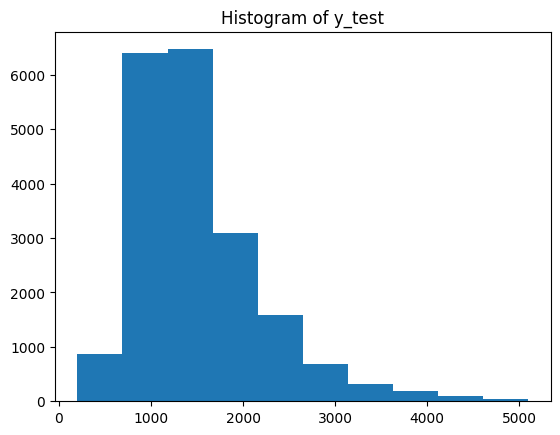

Test MSE: 221852.7360774301
Test R²: 0.530843126681168


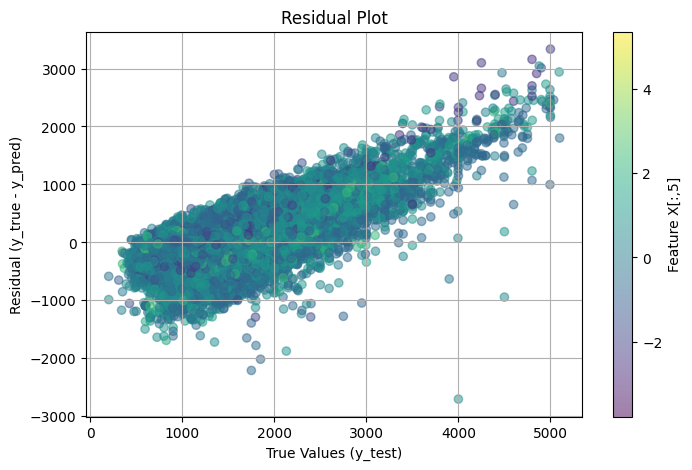

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from category_encoders import TargetEncoder

# ---------------------------------------------------------
# 1️⃣ Finales Alpha aus Nested CV (von dir vorher berechnet)
# ---------------------------------------------------------
best_parameters = ridge_cv.get_best_params()   # liefert Liste von dicts

# richtigen Key auslesen (z. B. "ridge__alpha" oder "model__alpha")
# Debug: print(best_parameters)
alpha_values = [float(list(p.values())[0]) for p in best_parameters]
final_alpha = np.median(alpha_values)
print("Final Alpha:", final_alpha)

# ---------------------------------------------------------
# 2️⃣ Train/Test Split
# ---------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

plt.hist(y_test)
plt.title("Histogram of y_test")
plt.show()

# ---------------------------------------------------------
# 3️⃣ Target Encoding korrekt (nur auf TRAIN fitten!)
# ---------------------------------------------------------
te = TargetEncoder(cols=["state"])   # deine kategorische Spalte

# Auf TRAIN fitten
te.fit(X_train["state"], y_train)

# Transformieren
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

X_train_enc["state"] = te.transform(X_train["state"])
X_test_enc["state"] = te.transform(X_test["state"])

# ---------------------------------------------------------
# 4️⃣ Finales Ridge-Modell trainieren
# ---------------------------------------------------------
final_model = Ridge(alpha=final_alpha)
final_model.fit(X_train_enc, y_train)

# ---------------------------------------------------------
# 5️⃣ Vorhersagen + Scores
# ---------------------------------------------------------
y_pred = final_model.predict(X_test_enc)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE:", mse)
print("Test R²:", r2)

# ---------------------------------------------------------
# 6️⃣ Residual Plot (Residuals oder Absolute Error)
# ---------------------------------------------------------
residuals = y_test - y_pred
abs_error = np.abs(y_test - y_pred)

plt.figure(figsize=(8,5))
scatter = plt.scatter(y_test, residuals, c=X_test_enc.iloc[:, 5], 
                      alpha=0.5, cmap='viridis')
plt.xlabel("True Values (y_test)")
plt.ylabel("Residual (y_true - y_pred)")
plt.title("Residual Plot")
plt.grid(True)
cbar = plt.colorbar(scatter)
cbar.set_label("Feature X[:,5]")
plt.show()
